In [104]:
%matplotlib inline

In [105]:
import pandas as pd

In [106]:
import seaborn as sns

In [107]:
import numpy as np

In [108]:
import matplotlib.pyplot as plt

In [109]:
df = pd.read_excel('DAY_PARTING_BATCH_TABLE.xlsx', sheet_name='Sheet0')

In [110]:
df.dropna(axis=1, how='all', inplace=True) # drops all columns where all values are NaN

In [111]:
df.drop(['Campaign','Account','Unnamed: 19','#a.d.sxty old geos'],axis=1,inplace=True) # drop some needless data

In [120]:
df2 = df[['Day of the week', 'Hour of the day','Conversions']] # retain only conversions for now

In [121]:
df2.columns = ['day','hour','conversions'] # rename to make column names shorter

In [122]:
days_index_dict = {'Monday':0,'Tuesday':1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6}

In [123]:
df2 = df2.replace({'day':days_index_dict}) 

## I am trying to get a heat map for conversions.
 It will indicate what time people are generally buying
Hours are PST, but main cities are on East coast, so we should add a 3 hours as a rough fix right now. We can refine this later.

In [124]:
df3 = df2.pivot_table(index='day', columns='hour',values='conversions', aggfunc=np.sum)

In [125]:
df3

hour  0   1   2   3   4   5   6    7    8    9  ...   14   15   16   17   18  \
day                                             ...                            
0     54  30  17  29  48  72  74  105  154  121 ...  129  183  194  214  176   
1     71  29  54  40  42  47  91   71   86  142 ...  154  138  168  182  176   
2     43  20  27  28  49  59  66   56   84  136 ...  197  146  127  173  151   
3     34  31  27  35  78  42  56   65   97  185 ...  146  136  136  147  191   
4     74  14  23  29  26  60  66   62  153   92 ...  123  228   88  149  130   
5     62  14  29  21  39  40  51   91  120  168 ...  153  133  162  181  152   
6     50  39  27  24  46  48  80   97   92  119 ...  217  200  199  187  204   

hour   19   20   21   22  23  
day                           
0     249  147  187   77  85  
1     179  239  152  129  84  
2     176  128  103   90  88  
3     190  117  110   85  66  
4     155  214  128  100  56  
5     121  150  154   99  65  
6     207  132  123  108  84  

[7 rows x 24 columns]

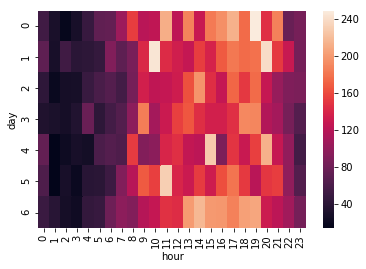

In [126]:
sns.heatmap(df3)

Brighter indicates more conversions. We already knew about Friday evening, but there is a bright spot Tuesday 10 PST as well. Maybe people are trying to get product delivery by the weekend? Worth exploring.